In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.chdir('./drive/MyDrive/AGRICULTURE/')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [8]:
data = pd.read_csv('./Data/Fertilizer.csv')

In [9]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [10]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [11]:
data.shape

(99, 9)

In [12]:
data['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [13]:
data['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

### Visualization and Analysis

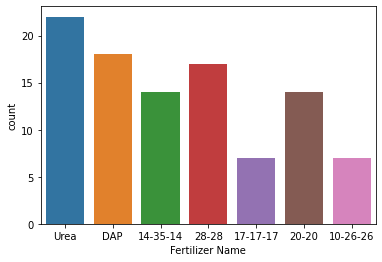

In [19]:
sns.countplot(data['Fertilizer Name'])

In [20]:
data['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

* Imbalanced Dataset

In [21]:
continuous_features = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_features = ["Soil Type", "Crop Type"]

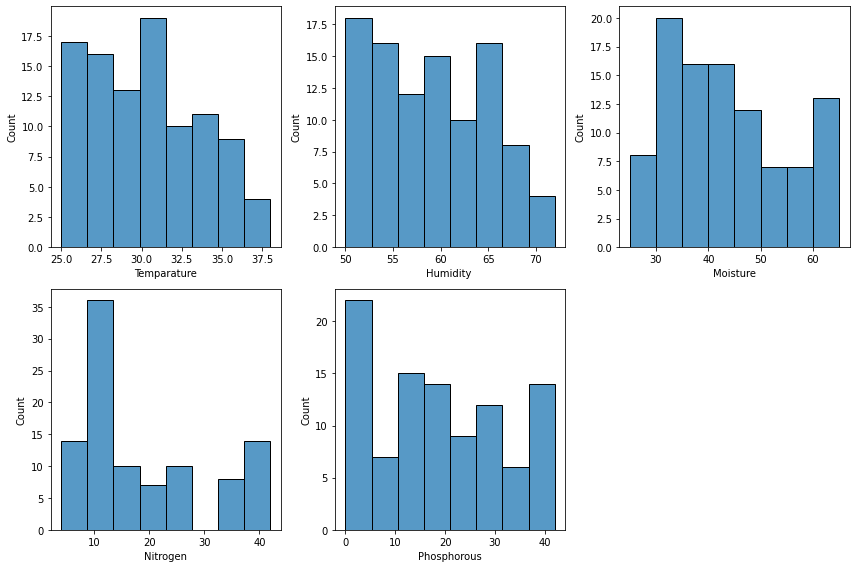

In [28]:
plt.figure(figsize=(12,8))
for i,col in enumerate(continuous_features):
  plt.subplot(2,3,i+1)
  sns.histplot(data[col])
  plt.xlabel(col)
  plt.tight_layout()
plt.show()

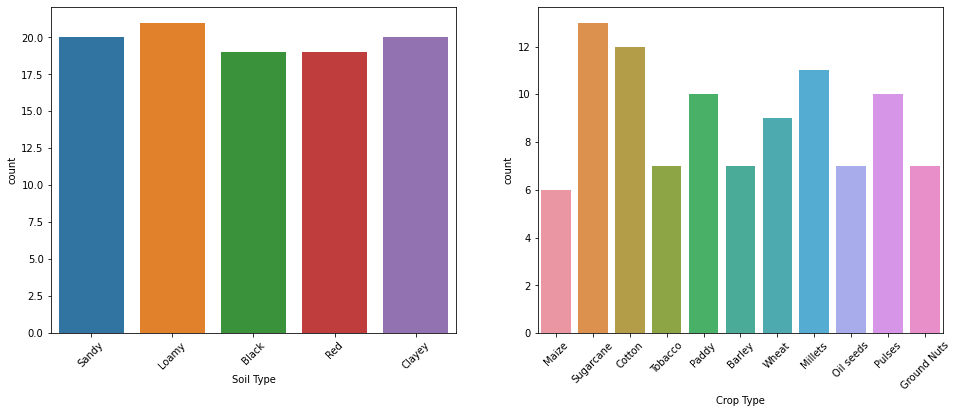

In [31]:
plt.figure(figsize=(16,6))
for i,col in enumerate(categorical_features):
  plt.subplot(1,2,i+1)
  sns.countplot(data[col])
  plt.xlabel(col)
  plt.xticks(rotation=45)
plt.show()


In [33]:
soil_type_encoder = LabelEncoder()
data['Soil Type'] = soil_type_encoder.fit_transform(data['Soil Type'])

In [34]:
crop_encoder = LabelEncoder()
data['Crop Type'] = crop_encoder.fit_transform(data['Crop Type'])

In [36]:
soil_type_dict = {}
crop_type_dict = {}

for i in range(len(data['Soil Type'].unique())):
  soil_type_dict[i] = soil_type_encoder.inverse_transform([i])[0]

for i in range(len(data['Crop Type'].unique())):
  crop_type_dict[i] = crop_encoder.inverse_transform([i])[0]

In [37]:
soil_type_dict

{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}

In [38]:
crop_type_dict

{0: 'Barley',
 1: 'Cotton',
 2: 'Ground Nuts',
 3: 'Maize',
 4: 'Millets',
 5: 'Oil seeds',
 6: 'Paddy',
 7: 'Pulses',
 8: 'Sugarcane',
 9: 'Tobacco',
 10: 'Wheat'}

In [39]:
fertilizer_encoder = LabelEncoder()
data['Fertilizer Name'] = fertilizer_encoder.fit_transform(data['Fertilizer Name'])

In [40]:
fertilizer_dict = {}
for i in range(len(data['Fertilizer Name'].unique())):
  fertilizer_dict[i] = fertilizer_encoder.inverse_transform([i])[0]
fertilizer_dict

{0: '10-26-26',
 1: '14-35-14',
 2: '17-17-17',
 3: '20-20',
 4: '28-28',
 5: 'DAP',
 6: 'Urea'}

In [41]:
X = data.drop("Fertilizer Name",axis=1)
y = data['Fertilizer Name']

### Upsampling

In [43]:
Counter(y)

Counter({0: 7, 1: 14, 2: 7, 3: 14, 4: 17, 5: 18, 6: 22})

In [45]:
upsampler = SMOTE()
X,y = upsampler.fit_resample(X,y)


Counter({0: 22, 1: 22, 2: 22, 3: 22, 4: 22, 5: 22, 6: 22})

In [46]:
Counter(y)

Counter({0: 22, 1: 22, 2: 22, 3: 22, 4: 22, 5: 22, 6: 22})

In [48]:
print(f"Total Data after Upsampling: {len(y)}")

Total Data after Upsampling: 154


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


Accuracy at k = 1 is 1.0
Accuracy at k = 2 is 0.967741935483871
Accuracy at k = 3 is 0.967741935483871
Accuracy at k = 4 is 0.8387096774193549
Accuracy at k = 5 is 0.8387096774193549
Accuracy at k = 6 is 0.8064516129032258
Accuracy at k = 7 is 0.8387096774193549
Accuracy at k = 8 is 0.8387096774193549
Accuracy at k = 9 is 0.8064516129032258
Accuracy at k = 10 is 0.8709677419354839
Accuracy at k = 11 is 0.8387096774193549
Accuracy at k = 12 is 0.8709677419354839
Accuracy at k = 13 is 0.7741935483870968
Accuracy at k = 14 is 0.8387096774193549
Accuracy at k = 15 is 0.7419354838709677
Accuracy at k = 16 is 0.7096774193548387
Accuracy at k = 17 is 0.7096774193548387
Accuracy at k = 18 is 0.8064516129032258
Accuracy at k = 19 is 0.7741935483870968
Accuracy at k = 20 is 0.7741935483870968
Accuracy at k = 21 is 0.7419354838709677
Accuracy at k = 22 is 0.8064516129032258
Accuracy at k = 23 is 0.7741935483870968
Accuracy at k = 24 is 0.7419354838709677
Accuracy at k = 25 is 0.7741935483870968
A

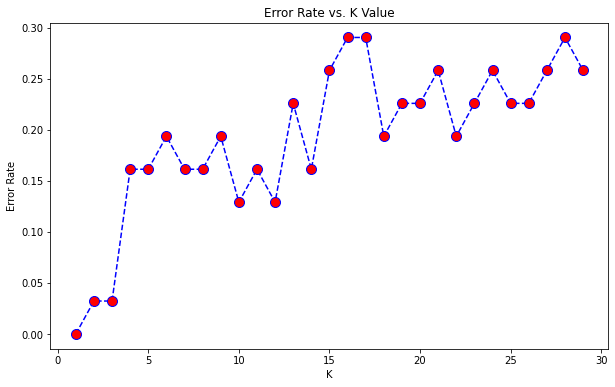

In [52]:
error_rate = []
for i in range(1, 30):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

At K=1 it is giving best but it is not best as Overfitting value.

So we cannot consider KNN

Accuracy on Test Data: 100.0%


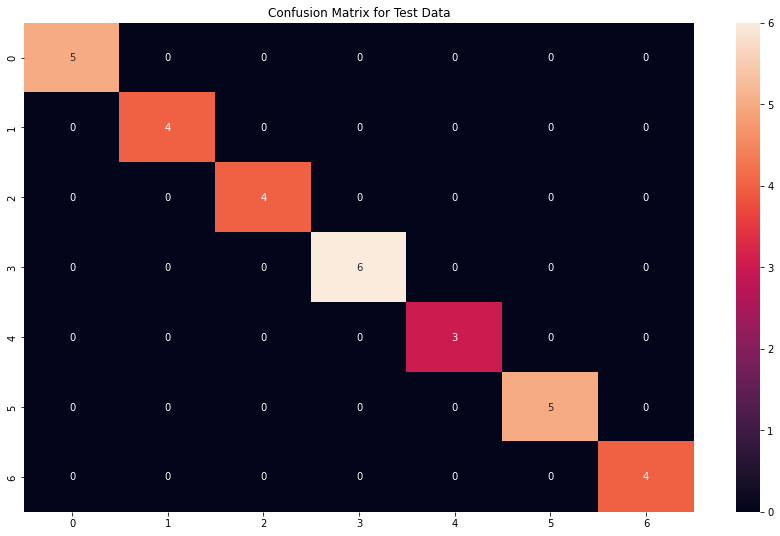

In [53]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Test Data: 100.0%


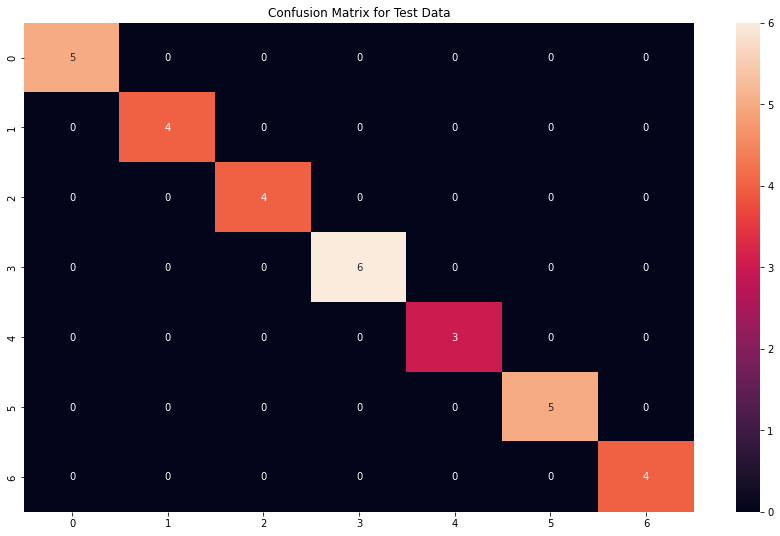

In [54]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 96))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

Accuracy on Test Data: 100.0%


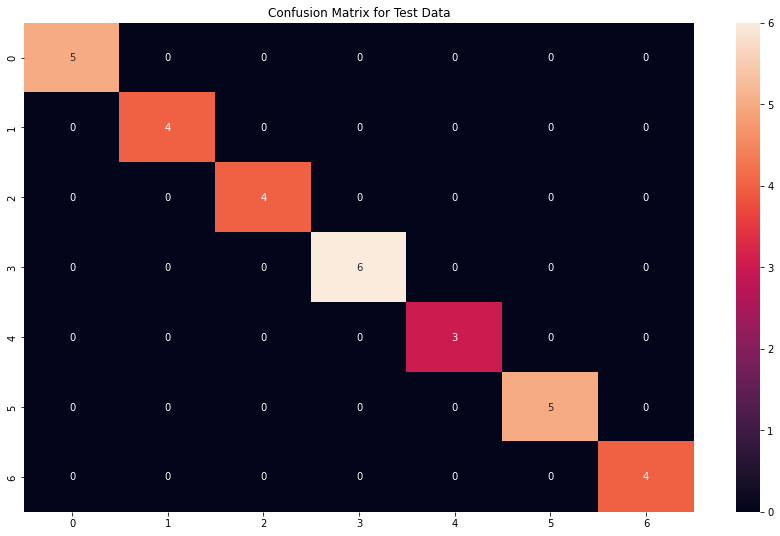

In [55]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 96))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

In [56]:
pickle.dump(svm_pipeline, open("./models/Fertilizer/svm_pipeline.pkl", "wb"))
pickle.dump(rf_pipeline, open("./models/Fertilizer/rf_pipeline.pkl", "wb"))
pickle.dump(xgb_pipeline, open("./models/Fertilizer/xgb_pipeline.pkl", "wb"))
pickle.dump(fertilizer_dict, open("./models/Fertilizer/fertilizer_dict.pkl", "wb"))
pickle.dump(crop_type_dict, open("./models/Fertilizer/crop_type_dict.pkl", "wb"))
pickle.dump(soil_type_dict, open("./models/Fertilizer/soil_type_dict.pkl", "wb"))
print("Saved All Models")

Saved All Models
